In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes

In [14]:
df = pd.read_csv("cleanedSample.csv",low_memory=False)

In [15]:
numerical_data = df[['Longitude', 'Latitude']]
categorical_data = df[['Day', 'Violation Code', 'Street']]

In [16]:
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

In [17]:
data_scaled = pd.concat([pd.DataFrame(numerical_data_scaled,columns=numerical_data.columns), categorical_data], axis=1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 448786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 448786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 448786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 448786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 448786.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1030, cost: 434207.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12180, cost: 434497.0
Init: initializing centroids
Init: initializing clusters
Star

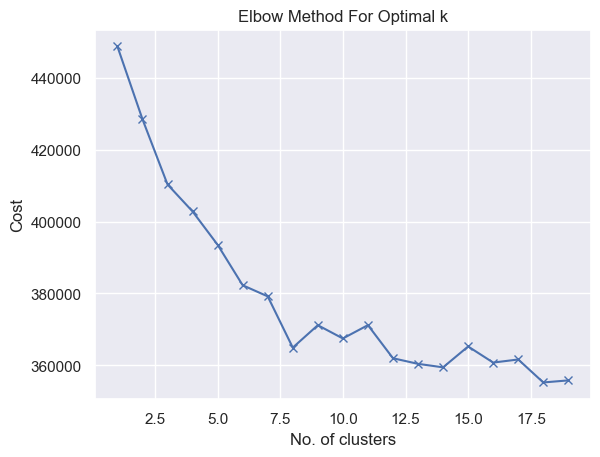

In [19]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_scaled)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
kmodes = KModes(n_clusters = 7, init = "random", n_init = 5, verbose=1)
kmodes.fit_predict(data_scaled)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22016, cost: 373917.0
Run 1, iteration: 2/100, moves: 4997, cost: 373917.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 42590, cost: 380827.0
Run 2, iteration: 2/100, moves: 1512, cost: 380827.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 33721, cost: 385217.0
Run 3, iteration: 2/100, moves: 11737, cost: 384564.0
Run 3, iteration: 3/100, moves: 252, cost: 384564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5525, cost: 405389.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 23219, cost: 377387.0
Run 5, iteration: 2/100, moves: 6370, cost: 377387.0
Best run was number 1


array([3, 1, 0, ..., 0, 2, 4], dtype=uint16)

In [11]:
labels = kmodes.labels_
data_scaled['Cluster'] = labels

<Axes: xlabel='Longitude', ylabel='Latitude'>

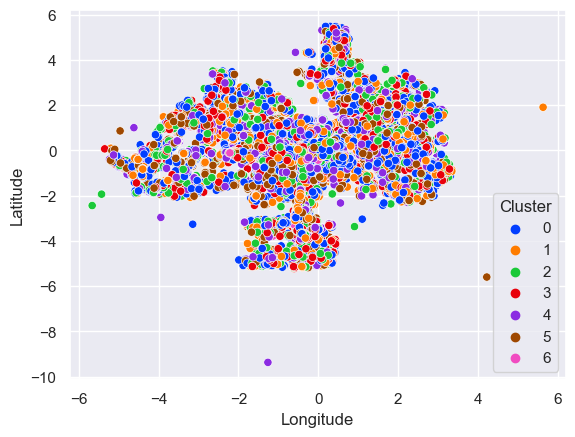

In [12]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=data_scaled, palette=palette)

24589